In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf

from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.model_selection import train_test_split
from tensorflow.keras import layers, losses
from tensorflow.keras.models import Model



## Import and processing data

In [2]:
x_train = pd.read_csv('train.csv')
y_train = np.asarray(x_train['label'], dtype='float32')
x_train = x_train.drop('label', axis=1)
x_test = pd.read_csv('test.csv')

In [3]:
#x_train, x_valid, y_train, y_valid = train_test_split(x_train_full,y_train_full, test_size=.10, random_state=42)

In [4]:
x_train = x_train.values.reshape(-1,28,28,1)
x_train = x_train.astype('float32') / 255.

In [5]:
#x_valid = x_valid.values.reshape(-1,28,28,1)
#x_valid = x_valid.astype('float32') / 255.

In [6]:
x_test = x_test.values.reshape(-1,28,28,1)
x_test = x_test.astype('float32') / 255.

In [7]:
x_train.shape

(42000, 28, 28, 1)

In [8]:
x_test.shape

(28000, 28, 28, 1)

In [9]:
x_train_ex =x_train[2].reshape([28,28,])

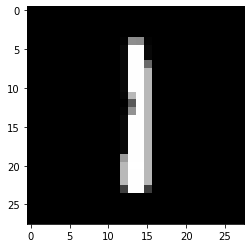

In [10]:
# Plot image data from x_train
plt.imshow(x_train_ex, cmap = "gray")
plt.show()

## Define autoencoder and train model

In [11]:
#Adding noise to images
noise_factor = 0.2
x_train_noisy = x_train + noise_factor * tf.random.normal(shape=x_train.shape)
x_test_noisy = x_test + noise_factor * tf.random.normal(shape=x_test.shape)

x_train_noisy = tf.clip_by_value(x_train_noisy, clip_value_min=0., clip_value_max=1.)
x_test_noisy = tf.clip_by_value(x_test_noisy, clip_value_min=0., clip_value_max=1.)

In [12]:
class Denoise(Model):
    def __init__(self):
        super(Denoise, self).__init__()
        self.encoder = tf.keras.Sequential([
            layers.Input(shape=(28,28,1)),                  
            layers.Conv2D(16, (3,3), activation='relu', padding='same', strides=2),   
            layers.Conv2D(32, (3,3), activation='relu', padding='same', strides=2),    
        ])
        self.decoder = tf.keras.Sequential([
            layers.Conv2DTranspose(32, kernel_size=3, strides=2, activation='relu', padding='same'),
            layers.Conv2DTranspose(16, kernel_size=3, strides=2, activation='relu', padding='same'),          
            layers.Conv2D(1, kernel_size=3,activation="sigmoid", padding="same")
        ])
    def call(self, x):
        encoded = self.encoder(x)
        decoded = self.decoder(encoded)
        return decoded
autoencoder = Denoise()

In [13]:
autoencoder.compile(optimizer='adam', loss="binary_crossentropy",metrics=["accuracy"])

In [14]:
history=autoencoder.fit(x_train_noisy, x_train, epochs=10, validation_split=0.1)

Epoch 1/10
1182/1182 [==============================] - 66s 56ms/step - loss: 0.1015 - accuracy: 0.8138 - val_loss: 0.0723 - val_accuracy: 0.8150
Epoch 2/10
1182/1182 [==============================] - 60s 51ms/step - loss: 0.0718 - accuracy: 0.8152 - val_loss: 0.0713 - val_accuracy: 0.8150
Epoch 3/10
1182/1182 [==============================] - 64s 55ms/step - loss: 0.0711 - accuracy: 0.8152 - val_loss: 0.0708 - val_accuracy: 0.8150
Epoch 4/10
1182/1182 [==============================] - 66s 56ms/step - loss: 0.0705 - accuracy: 0.8152 - val_loss: 0.0702 - val_accuracy: 0.8150
Epoch 5/10
1182/1182 [==============================] - 65s 55ms/step - loss: 0.0701 - accuracy: 0.8152 - val_loss: 0.0699 - val_accuracy: 0.8150
Epoch 6/10
1182/1182 [==============================] - 68s 58ms/step - loss: 0.0698 - accuracy: 0.8152 - val_loss: 0.0697 - val_accuracy: 0.8150
Epoch 7/10
1182/1182 [==============================] - 65s 55ms/step - loss: 0.0696 - accuracy: 0.8152 - val_loss: 0.0694 -

In [15]:
history.history

{'loss': [0.10148061066865921,
  0.07180915027856827,
  0.07105870544910431,
  0.07054796814918518,
  0.0701390728354454,
  0.06978072226047516,
  0.06955526769161224,
  0.06939947605133057,
  0.06930264085531235,
  0.0691995769739151],
 'accuracy': [0.8138054013252258,
  0.8152117729187012,
  0.8152279853820801,
  0.8152356147766113,
  0.8152392506599426,
  0.8152432441711426,
  0.8152432441711426,
  0.8152440190315247,
  0.8152446150779724,
  0.8152465224266052],
 'val_loss': [0.07233138382434845,
  0.07127723842859268,
  0.07075410336256027,
  0.0702287033200264,
  0.06987883895635605,
  0.06970217823982239,
  0.06944173574447632,
  0.0693328008055687,
  0.06927775591611862,
  0.06915205717086792],
 'val_accuracy': [0.8149833083152771,
  0.8150103092193604,
  0.8150148987770081,
  0.8150273561477661,
  0.8150330781936646,
  0.8150343298912048,
  0.8150349259376526,
  0.8150385618209839,
  0.8150321841239929,
  0.81503826379776]}

In [16]:
autoencoder.summary()

Model: "denoise"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
sequential (Sequential)      (None, 7, 7, 32)          4800      
_________________________________________________________________
sequential_1 (Sequential)    (None, 28, 28, 1)         14017     
Total params: 18,817
Trainable params: 18,817
Non-trainable params: 0
_________________________________________________________________


In [17]:
samples=x_train_noisy[:5]
targets=y_train[:5]
denoised_images=autoencoder.predict(samples)

In [18]:
samples.shape

TensorShape([5, 28, 28, 1])

In [19]:
denoised_images.shape

(5, 28, 28, 1)

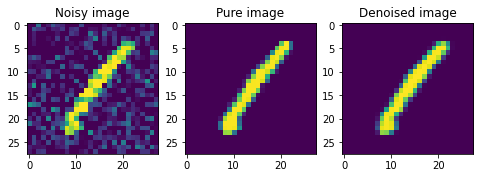

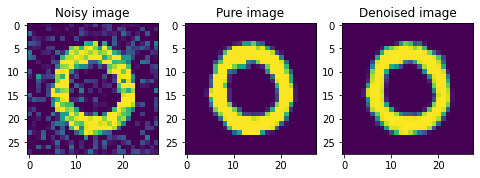

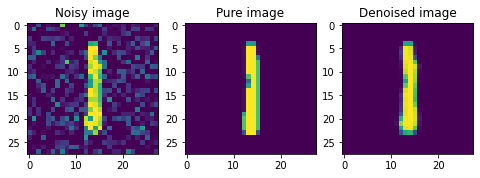

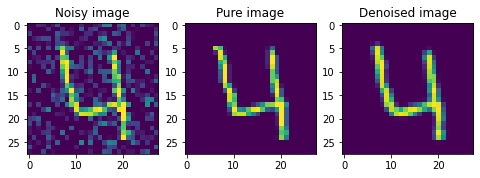

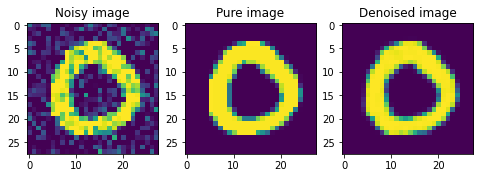

In [20]:
for i in range(0,5):
    noisy_image=x_train_noisy[i][:,:,0]
    pure_image=x_train[i][:,:,0]
    denoised_image=denoised_images[i][:,:,0]
# Matplotlib preparations
    fig,axes=plt.subplots(1,3)
    fig.set_size_inches(8, 3.5)
    axes[0].imshow(noisy_image)
    axes[0].set_title('Noisy image')
    axes[1].imshow(pure_image)
    axes[1].set_title('Pure image')
    axes[2].imshow(denoised_image)
    axes[2].set_title('Denoised image')
    plt.show()

In [21]:
#### Let's see how we perform on test data!

In [22]:
test_predictions_history = autoencoder.predict(x_test)


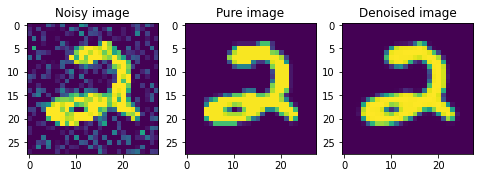

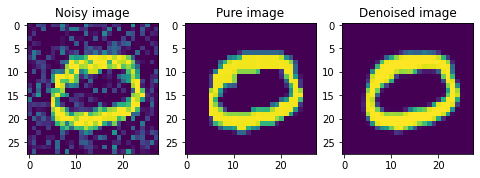

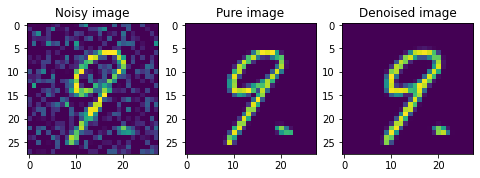

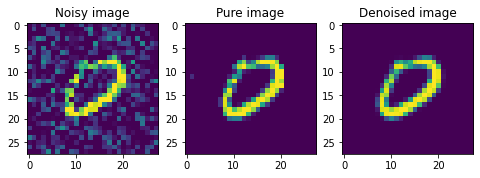

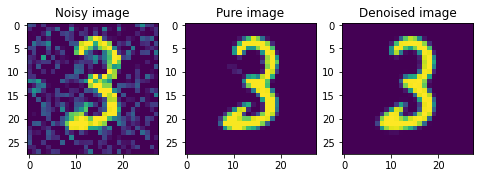

In [23]:
for i in range(0,5):
    noisy_image=x_test_noisy[i][:,:,0]
    pure_image=x_test[i][:,:,0]
    denoised_image=test_predictions_history [i][:,:,0]
# Matplotlib preparations
    fig,axes=plt.subplots(1,3)
    fig.set_size_inches(8, 3.5)
    axes[0].imshow(noisy_image)
    axes[0].set_title('Noisy image')
    axes[1].imshow(pure_image)
    axes[1].set_title('Pure image')
    axes[2].imshow(denoised_image)
    axes[2].set_title('Denoised image')
    plt.show()

In [24]:
# Train classifier 

In [25]:
x_train_noisy
y_train
denoised_images=autoencoder.predict(x_train_noisy)

In [26]:
test_predictions_history 

array([[[[2.98105952e-05],
         [7.04810645e-07],
         [1.28024453e-06],
         ...,
         [2.73057594e-06],
         [3.80713027e-06],
         [3.12055054e-05]],

        [[1.94096719e-05],
         [1.00618280e-09],
         [8.61368310e-09],
         ...,
         [3.28733130e-09],
         [2.52999826e-08],
         [1.15073763e-05]],

        [[2.04558683e-06],
         [9.22791787e-10],
         [3.09955261e-08],
         ...,
         [1.76255188e-08],
         [4.30423839e-08],
         [1.73896683e-06]],

        ...,

        [[5.24518873e-06],
         [6.78273393e-09],
         [1.35027662e-07],
         ...,
         [1.76712405e-07],
         [4.16514823e-08],
         [8.71496559e-06]],

        [[3.15485863e-06],
         [7.08185555e-09],
         [1.50408724e-07],
         ...,
         [6.34033270e-08],
         [2.76664416e-08],
         [1.63187815e-06]],

        [[8.06920889e-06],
         [1.93824326e-06],
         [1.37313248e-06],
         ...,
 

In [27]:
from keras.models import load_model

In [29]:
model = load_model('my_keras_model4.h5')

In [31]:
model.summary()
loss, acc = model.evaluate(denoised_images,y_train)
print('Restored model, accuracy: {:5.2f}%'.format(100 * acc))

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_4 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_15 (Dense)             (None, 200)               157000    
_________________________________________________________________
dense_16 (Dense)             (None, 200)               40200     
_________________________________________________________________
dense_17 (Dense)             (None, 200)               40200     
_________________________________________________________________
dense_18 (Dense)             (None, 100)               20100     
_________________________________________________________________
dense_19 (Dense)             (None, 100)               10100     
_________________________________________________________________
dense_20 (Dense)             (None, 10)               

In [40]:
test_predictions = np.argmax(model.predict(test_predictions_history),axis=1)
test_predictions

array([2, 0, 9, ..., 3, 9, 2])

In [43]:
results = pd.DataFrame(test_predictions)
results.index= np.arange(1,len(results)+1)
results.to_csv('assignment_9.csv')